--- 

### DSGA1007

--- 

### HW07 

### Due Date: Sunday 2021-12-05, 8 PM

---

#### Student Name: 

#### Student NetID:

**Problem 1 (100 points)**


In this HW as in Lab11 we consider some of the data sets on `restaurant-data-with-consumer-ratings` from: https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings

The data is attached. For all details on data sets, see descriptions in the README file. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1.1 (5 points)**

Use a shell command to display all provided `*.csv` files (i.e. display the names of all csv files provided).

In [3]:
%cd /Users/seonhyeyang/Downloads/data_2

/Users/seonhyeyang/Downloads/data_2


In [3]:
!ls

README             chefmozhours4.csv  rating_final.csv   userprofile.csv
chefmozaccepts.csv chefmozparking.csv usercuisine.csv
chefmozcuisine.csv geoplaces2.csv     userpayment.csv


In [ ]:
#there are 10 csv files

**1.2 (5 points)**

Read `./userpayment.csv`, print its head, and print the number of all transactions, i.e. `Upayment`s.

In [33]:
!cat userpayment.csv| head

userID,Upayment
U1001,cash
U1002,cash
U1003,cash
U1004,cash
U1004,bank_debit_cards
U1005,cash
U1006,cash
U1007,cash
U1008,cash


In [40]:
!cat userpayment.csv| cut -f2 -d ","| tail -n +2| wc -l
print("there are 177 transactions")

     177
there are 177 transactions


**1.3 (5 points)**

Read `'./userprofile.csv'`, and print its head.

In [42]:
!cat userprofile.csv| head

userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
U1004,18.867,-99.183,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69
U1006,22.15,-100.983,true,social drinker,no preference,friends,ca

**1.4 (5 points)**


From this table, one can get many characteristics of the users. Let us consider heights of the users. What are the minimum height and the maximum height of all users? 

In [62]:
#minimum height
!cat userprofile.csv| cut -f19 -d ","|tail -n +2| sort -n| head -1

1.2


In [74]:
#maximum height
!cat userprofile.csv| cut -f19 -d ","|tail -n +2| sort -n| tail -1

2


**1.5 (5 points)** 

Plot a histogram of the heights of users. 

Set the parameter `bins=250` (which is the number of bins in the given histogram).

Text(0.5, 1.0, 'Height of Users')

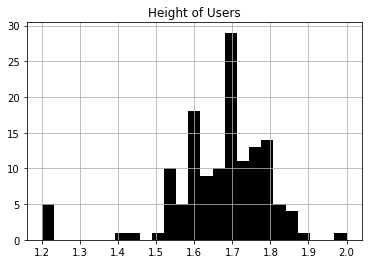

In [47]:
df = pd.read_csv("userprofile.csv")
height = df["height"]
height.hist(bins = 25, color = "black")
plt.title("Height of Users")

**1.6 (5 points)**


What is the number of users with the height of 1.80 meters?

In [204]:
df[df["height"] == 1.8]


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
5,U1006,22.150000,-100.983000,true,social drinker,no preference,friends,car owner,single,independent,1989,variety,hard-worker,none,student,blue,75,medium,1.8
51,U1052,22.138055,-100.936005,true,social drinker,no preference,family,on foot,single,independent,1990,none,conformist,Catholic,student,blue,85,low,1.8
130,U1131,22.138245,-100.910948,true,social drinker,no preference,friends,car owner,married,kids,1990,eco-friendly,hard-worker,none,student,black,90,medium,1.8


In [205]:
print("there are 3 users with the height of 1.80 meters")

there are 3 users with the height of 1.80 meters


**1.7 (5 points)**

Read `./rating_final.csv`, and print its head.

In [4]:
!cat rating_final.csv | head

userID,placeID,rating,food_rating,service_rating
U1077,135085,2,2,2
U1077,135038,2,2,1
U1077,132825,2,2,2
U1077,135060,1,2,2
U1068,135104,1,1,2
U1068,132740,0,0,0
U1068,132663,1,1,1
U1068,132732,0,0,0
U1068,132630,1,1,1


**1.8 (5 points)**

Read `./geoplaces2.csv`, print its head.

In [6]:
!cat geoplaces2.csv | head

placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC464A41,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
132825,22.1473922,-100.983092,0101000020957F00001AD016568C4858C1243261274BA54B41,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,78280,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
135106,22.1497088,-100.9760928,0101000020957F0000649D6F21634858C119AE9BF528A34B41,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
132667,23.7526973,-99.1633594,0101000020957F00005D67BCDDED8157C1222A2DC8D84D4941,little pizza Emilio Portes

**1.9 (5 points)**

Print the number of unique users(i.e. 'userID') as well as the number of unique restaurants (i.e. 'placeID'),
included in `./rating_final.csv`.

In [29]:
#userID
!cat rating_final.csv| cut -f1 -d ","|tail -n +2|sort| uniq|wc -l

     138


In [31]:
#placeID
!cat rating_final.csv| cut -f2 -d ","| tail -n +2|sort| uniq| wc -l

     130


**1.10 (15 points)**

Use the ratings `rating_final.csv`. 'Group by' the data by `placeID` and obtain `mean` and `std` of each of the ratings (`rating`, `food_rating`, and `service_rating`) for each restaurant (i.e. for each `placeID`).

Print the head of this frame so to show the results. 

In [147]:
rating = pd.read_csv("rating_final.csv")
ratings = rating.iloc[:, 1:]
#mean
ratings.groupby(ratings["placeID"]).mean().head()

,rating,food_rating,service_rating
placeID,,,
132560,0.50,1.00,0.250000
132561,0.75,1.00,1.000000
132564,1.25,1.25,1.500000
132572,1.00,1.00,0.933333
132583,1.00,1.00,1.250000


In [148]:
#std
ratings.groupby(ratings["placeID"]).std().head()

,rating,food_rating,service_rating
placeID,,,
132560,0.577350,1.154701,0.500000
132561,0.500000,0.816497,0.816497
132564,0.500000,0.500000,0.577350
132572,0.654654,0.925820,0.883715
132583,0.816497,1.154701,0.957427


**1.11 (10 points)**


Rank the restaurants IDs (i.e. 'placeID') by their `mean ratings` increasingly.

Print the restaurants IDs (i.e. 'placeID') and `mean ratings` with the lowest `mean ratings` (hint: lowest appears at the top).

Print the restaurants IDs (i.e. 'placeID') and `mean ratings` with the highest `mean ratings` (hint: highest appears at the bottom).



In [206]:
avg = ratings.groupby(ratings["placeID"]).mean()
avg.sort_values(by=["rating"])

,rating,food_rating,service_rating
placeID,,,
132654,0.250000,0.25,0.250000
135040,0.250000,0.25,0.250000
132560,0.500000,1.00,0.250000
132663,0.500000,0.50,0.666667
135069,0.500000,0.50,0.750000
...,...,...,...
132755,1.800000,2.00,1.600000
132922,1.833333,1.50,1.833333
134986,2.000000,2.00,2.000000


**1.12 (10 points)**

Make and print a table with columns (`place`, `mean`, `name`), 
which are the restaurant's ID, mean ratings, and name, 
of the 10 restaurants with the lowest `mean ratings`.


In [124]:
geo = pd.read_csv("geoplaces2.csv")

In [156]:
merged = pd.merge(rating, geo, on = "placeID")
merging = merged[["placeID", "rating", "name"]]
final_merging = merging.groupby(merging["name"]).mean()
final_merging.sort_values(by=["rating"]).head(10)

,placeID,rating
name,,
Restaurant los Compadres,135040.0,0.250
Carnitas Mata Calle 16 de Septiembre,132654.0,0.250
Abondance Restaurante Bar,135069.0,0.500
tacos abi,132663.0,0.500
puesto de gorditas,132560.0,0.500
Tortas y hamburguesas el gordo,132870.0,0.600
Hamburguesas saul,132885.0,0.600
Pollo_Frito_Buenos_Aires,132609.0,0.600
tacos de barbacoa enfrente del Tec,132594.0,0.600


**1.13 (10 points)**

Make and print a table with columns (`place`, `mean`, `name`), 
which are the restaurant's ID, mean ratings, and name, 
of the 10 restaurants with the highest `mean ratings`.


In [157]:
final_merging.sort_values(by=["rating"]).tail(10)

,placeID,rating
name,,
Mariscos El Pescador,135075.0,1.692308
la Cochinita Pibil Restaurante Yucateco,135055.0,1.714286
Giovannis,135013.0,1.750000
Restaurante la Parroquia Potosina,135074.0,1.750000
Log Yin,134976.0,1.750000
La Estrella de Dimas,132755.0,1.800000
cafe punta del cielo,132922.0,1.833333
emilianos,132955.0,2.000000
Michiko Restaurant Japones,135034.0,2.000000


**1.14 (10 points)**


Print `name`, `city`, `state` for the two restaurants with the lowest and highest rank from the "1.11" problem sorted data frame (which ranks the restaurants IDs (i.e. 'placeID') by their `mean ratings` increasingly).




In [200]:
bottom_ten = final_merging.sort_values(by=["rating"]).head(10)
top_ten = final_merging.sort_values(by=["rating"]).tail(10)

bten = list(bottom_ten.index.values)
tten = list(top_ten.index.values)

print("Bottom Ten")
print(geo[geo['name'].isin(bten)][["name", "city", "state"]])
print()
print("Top Ten")
print(geo[geo['name'].isin(tten)][["name", "city", "state"]])

Bottom Ten
                                      name             city            state
5                 Restaurant los Compadres  San Luis Potosi              SLP
6                       Taqueria EL amigo       Cd Victoria       Tamaulipas
8                 Pollo_Frito_Buenos_Aires         victoria       Tamaulipas
11               Abondance Restaurante Bar  San Luis Potosi              SLP
15          Tortas y hamburguesas el gordo  San Luis Potosi  San Luis Potosi
85                       Hamburguesas saul  San Luis Potosi  San Luis Potosi
103  Carnitas Mata  Calle 16 de Septiembre        victoria        tamaulipas
106                     puesto de gorditas         victoria       tamaulipas
111     tacos de barbacoa enfrente del Tec                ?                ?
122                              tacos abi         victoria       tamaulipas

Top Ten
                                        name             city    state
24                                 Giovannis         Jiutepec 